# Load Library

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torchvision
from torchvision import datasets, transforms
import torch
from torch.utils.data import random_split, DataLoader
import time

from sklearn.model_selection import train_test_split


In [2]:
my_root_path = "/content/cifar10"                                            # data Ï†ÄÏû• ÏúÑÏπò.
my_model_repo = "/content/drive/MyDrive/Classroom/AI Programming/pretrained" # model Ï†ÄÏû• ÏúÑÏπò.

# TrainsetÍ≥º Testset ÏÉùÏÑ±.

1. cifar10 Ïùò 10Í∞ÄÏßÄ Ï¢ÖÎ•ò

In [3]:
class_names = ['airplane', 'car',
               'bird', 'cat',
               'deer', 'dog',
               'frog', 'horse',
               'ship', 'truck']

2. cifar10ÏùÑ Îã§Ïö¥Î°úÎìú
3. trainÍ≥º testÎ•º ÏúÑÌïú Dataset ÏÉùÏÑ±.
  * `torch.tensor`Î°ú Î≥ÄÌôò.
  * `standaradization`ÏùÑ ÏàòÌñâ.

In [4]:
data_path = os.path.join('dataset')

transform = transforms.Compose(
    [
        transforms.ToTensor(),
        # transforms.Normalize(
        #     (0.4915, 0.4823, 0.4468),
        #     (0.2470, 0.2435, 0.2616)
        # )
    ]
)

cifar10_train = datasets.CIFAR10(
    data_path,
    train = True,
    download = True,
    transform = transform,
)

cifar10_test = datasets.CIFAR10(
    data_path,
    train = False,
    download = True,
    transform = transform,
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 170M/170M [00:03<00:00, 48.6MB/s]


In [5]:
cifar10_train.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [6]:
cifar10_train.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [7]:
print(f'{type(transform)     = }')
print(f'{type(cifar10_train) = }')
print(f'{type(cifar10_test)  = }')

type(transform)     = <class 'torchvision.transforms.transforms.Compose'>
type(cifar10_train) = <class 'torchvision.datasets.cifar.CIFAR10'>
type(cifar10_test)  = <class 'torchvision.datasets.cifar.CIFAR10'>


In [8]:
x_train, x_val, y_train, y_val = train_test_split(
    cifar10_train.data, cifar10_train.targets, test_size=0.2, random_state=42
)


# StandardScalerÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Î•º ÌëúÏ§ÄÌôîÌï©ÎãàÎã§.
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler = StandardScaler()
scaler = MinMaxScaler()
N_train, C, H, W = x_train.shape
N_val = x_val.shape[0]

train_data = x_train.reshape((N_train, -1))
val_data = x_val.reshape((N_val, -1))
train_data = scaler.fit_transform(train_data)
val_data = scaler.transform(val_data)
x_train = train_data.reshape((N_train, C, H, W))
x_val = val_data.reshape((N_val, C, H, W))


import torch.utils.data as data

train_set = data.TensorDataset(torch.tensor(x_train).permute(0,3,1,2).float(),
                               torch.tensor(y_train).long())
validation_set  = data.TensorDataset(torch.tensor(x_val).permute(0,3,1,2).float(),
                                     torch.tensor(y_val).long())

In [9]:
batch_size = 32
n_worker = 0
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size = batch_size,
    shuffle = True,
    num_workers = n_worker,
)

valid_loader = torch.utils.data.DataLoader(
    validation_set,
    batch_size = batch_size,
    shuffle = False,
    num_workers = n_worker,
)

test_loader = torch.utils.data.DataLoader(
    cifar10_test,
    batch_size = batch_size,
    shuffle = False,
    num_workers = n_worker,
)

In [10]:
print(f"Train dataset size: {len(train_loader.dataset)}")
print(f"Validation dataset size: {len(valid_loader.dataset)}")
print(f"Test dataset size: {len(test_loader.dataset)}")

Train dataset size: 40000
Validation dataset size: 10000
Test dataset size: 10000


type(grid_img)=<class 'torch.Tensor'>
max_val.item()=1.0
min_val.item()=0.0


(np.float64(-0.5), np.float64(273.5), np.float64(137.5), np.float64(-0.5))

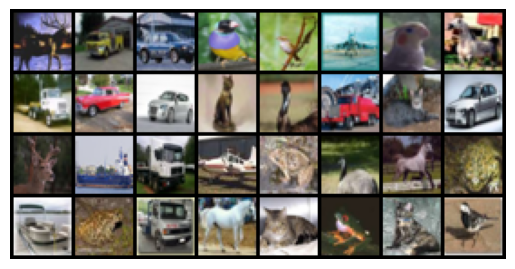

In [11]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

grid_img = torchvision.utils.make_grid(images)
max_val = torch.max(grid_img)
min_val = torch.min(grid_img)
print(f'{type(grid_img)=}\n{max_val.item()=}\n{min_val.item()=}')

normalized_grid_img = (grid_img - min_val) / (max_val - min_val)
plt.imshow(np.transpose(normalized_grid_img, (1,2,0)))
plt.axis('off')

# Train Loop

In [ ]:
# from tqdm.auto import tqdm

# def train_loop (
#     n_epoch,
#     train_loader, val_loader,
#     model, optimizer, loss_fnc,
#     device = 'cpu',):

#   log_hist = torch.zeros([0,3]).to(device)
#   tmp = torch.empty((1, 3), device=log_hist.device)

#   model = model.to(device)
#   start_time = time.time()  # iteration ÏãúÏûë ÏãúÍ∞Ñ Í∏∞Î°ù
#   best_loss_val = float('inf')
#   best_model_wts = None

#   for epoch in tqdm(range(n_epoch)):
#     # print(f'\r{epoch:6>}', end='')

#     model.train()
#     for x_tensor, y_tensor in train_loader:

#       x_tensor = x_tensor.to(device)
#       y_tensor = y_tensor.to(device)
#     #   x_tensor.to(device)
#     #   y_tensor.to(device)

#       y_pred = model(x_tensor)
#       # print(y_tensor.shape)
#       loss_train = loss_fnc(y_pred,y_tensor)

#       if torch.isinf(loss_train):
#         print(f'Error: loss is infinity!')
#         break

#       optimizer.zero_grad()
#       loss_train.backward()
#       optimizer.step()

#     with torch.no_grad():
#       model.eval()
#       for x_tensor, y_tensor in val_loader:
#         x_tensor = x_tensor.to(device)
#         y_tensor = y_tensor.to(device)
#         pred = model(x_tensor)
#         loss_val = loss_fnc(pred, y_tensor)

#     if loss_val < best_loss_val:
#         best_loss_val = loss_val
#         print(f'best model wts at {epoch} : {loss_val = }')
#         best_model_wts = model.state_dict()

#     if epoch % 5 == 0:

#       # tmp = torch.tensor([epoch, loss_train.item(), loss_val.item()]).to(log_hist.device)
#       tmp[0, 0] = epoch
#       tmp[0, 1] = loss_train.item()
#       tmp[0, 2] = loss_val.item()

#       # print(tmp)
#       log_hist = torch.concat( (log_hist, tmp.reshape(1,-1)), dim=0 )
#       end_time = time.time()  # iteration Ï¢ÖÎ£å ÏãúÍ∞Ñ Í∏∞Î°ù
#       iteration_time = (end_time - start_time)  # ÏÜåÏöî ÏãúÍ∞ÑÏùÑ Ï¥à Îã®ÏúÑÎ°ú Í≥ÑÏÇ∞
#       print(f'{epoch+1}/{n_epoch} Epoch [{iteration_time:.2f}s]/ loss {loss_train.item():.4f} / val_loss {loss_val.item():.4f}')

#       start_time = time.time()  # iteration ÏãúÏûë ÏãúÍ∞Ñ Í∏∞Î°ù

#     if epoch == n_epoch-1:
#       tmp[0, 0] = epoch
#       tmp[0, 1] = loss_train.item()
#       tmp[0, 2] = loss_val.item()
#       end_time = time.time()  # iteration Ï¢ÖÎ£å ÏãúÍ∞Ñ Í∏∞Î°ù
#       iteration_time = (end_time - start_time)  # ÏÜåÏöî ÏãúÍ∞ÑÏùÑ Ï¥à Îã®ÏúÑÎ°ú Í≥ÑÏÇ∞
#       print(f'{epoch+1}/{n_epoch} Epoch [{iteration_time:.2f}s] / loss {loss_train.item():.4f} / val_loss {loss_val.item():.4f}')

#   return best_model_wts,log_hist

In [12]:
import torch
import time
import copy
import os
from pathlib import Path
from typing import Optional, Tuple, Dict, Any, Union
from tqdm import tqdm


def train_loop(
    n_epoch: int,                                   # Ï¥ù ÌõàÎ†®Ìï† epoch Ïàò (Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î™á Î≤à Î∞òÎ≥µÌï†ÏßÄ)
    train_loader: torch.utils.data.DataLoader,      # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î•º Î∞∞Ïπò Îã®ÏúÑÎ°ú Ï†úÍ≥µÌïòÎäî DataLoader
    val_loader: torch.utils.data.DataLoader,        # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î•º Î∞∞Ïπò Îã®ÏúÑÎ°ú Ï†úÍ≥µÌïòÎäî DataLoader
    model: torch.nn.Module,                         # ÌõàÎ†®Ìï† Ïã†Í≤ΩÎßù Î™®Îç∏ (nn.ModuleÏùÑ ÏÉÅÏÜçÎ∞õÏùÄ ÌÅ¥ÎûòÏä§)
    optimizer: torch.optim.Optimizer,               # Í∞ÄÏ§ëÏπò ÏóÖÎç∞Ïù¥Ìä∏Î•º Îã¥ÎãπÌïòÎäî ÏòµÌã∞ÎßàÏù¥Ï†Ä (SGD, Adam Îì±)
    loss_fnc: Optional[torch.nn.Module] = None,     # ÏÜêÏã§Ìï®Ïàò (MSELoss, CrossEntropyLoss Îì±) - HF Î™®Îç∏Ïù¥ ÏïÑÎãå Í≤ΩÏö∞ ÌïÑÏàò
    device: str = 'cpu',                            # Ïó∞ÏÇ∞ÏùÑ ÏàòÌñâÌï† ÎîîÎ∞îÏù¥Ïä§ ('cpu' ÎòêÎäî 'cuda')
    print_every: int = 5,                           # Î™á epochÎßàÎã§ ÏßÑÌñâÏÉÅÌô©ÏùÑ Ï∂úÎ†•Ìï†ÏßÄ Í≤∞Ï†ï
    early_stop_patience: Optional[int] = None,      # Early stopping: Î™á epoch ÎèôÏïà Í∞úÏÑ†Ïù¥ ÏóÜÏúºÎ©¥ Ï§ëÎã®Ìï†ÏßÄ
    save_best_model: bool = True,                   # ÏµúÍ≥† ÏÑ±Îä•Ïùò Î™®Îç∏ Í∞ÄÏ§ëÏπòÎ•º Ï†ÄÏû•Ìï†ÏßÄ Ïó¨Î∂Ä
    save_best_model_to_file: bool = False,          # ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ÏùÑ ÌååÏùºÎ°ú Ï†ÄÏû•Ìï†ÏßÄ Ïó¨Î∂Ä
    best_model_path: Optional[str] = None,          # ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ÏùÑ Ï†ÄÏû•Ìï† ÌååÏùº Í≤ΩÎ°ú
    verbose: bool = True,                           # ÏÉÅÏÑ∏Ìïú Ï∂úÎ†•ÏùÑ Ìï†ÏßÄ Ïó¨Î∂Ä (FalseÎ©¥ Ï°∞Ïö©Ìûà ÌõàÎ†®)
) -> Tuple[torch.nn.Module, torch.Tensor, Optional[torch.nn.Module]]:
    """
    Í∞úÏÑ†Îêú PyTorch ÌõàÎ†® Î£®ÌîÑ - ÏùºÎ∞ò PyTorch Î™®Îç∏Í≥º Hugging Face Transformers Î™®Îç∏ Î™®Îëê ÏßÄÏõê

    Ïù¥ Ìï®ÏàòÎäî Îî•Îü¨Îãù Î™®Îç∏Ïùò Ï†ÑÏ≤¥ ÌõàÎ†® Í≥ºÏ†ïÏùÑ Í¥ÄÎ¶¨Ìï®.

    ÏßÄÏõêÌïòÎäî Î™®Îç∏ ÌÉÄÏûÖ:
    1. ÏùºÎ∞ò PyTorch Î™®Îç∏: DataLoaderÍ∞Ä (input, target) ÌäúÌîåÏùÑ Î∞òÌôòÌïòÍ≥† Î≥ÑÎèÑ loss Ìï®Ïàò ÌïÑÏöî
    2. Hugging Face Transformers Î™®Îç∏: DataLoaderÍ∞Ä ÎîïÏÖîÎÑàÎ¶¨Î•º Î∞òÌôòÌïòÍ≥† Î™®Îç∏Ïù¥ lossÎ•º ÏßÅÏ†ë Í≥ÑÏÇ∞

    ÌõàÎ†®ÏùÄ Îã§ÏùåÍ≥º Í∞ôÏùÄ Îã®Í≥ÑÎ°ú ÏßÑÌñâÎê©ÎãàÎã§:
    1. Î™®Îç∏ÏùÑ ÌõàÎ†® Î™®ÎìúÎ°ú ÏÑ§Ï†ï
    2. ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î°ú ÏàúÏ†ÑÌåå(forward pass) ÏàòÌñâ
    3. ÏÜêÏã§ Í≥ÑÏÇ∞ (Î™®Îç∏ ÌÉÄÏûÖÏóê Îî∞Îùº ÏûêÎèô Í∞êÏßÄ)
    4. Ïó≠Ï†ÑÌåå(backward pass)Î°ú Í∑∏ÎûòÎîîÏñ∏Ìä∏ Í≥ÑÏÇ∞
    5. ÏòµÌã∞ÎßàÏù¥Ï†ÄÎ°ú Í∞ÄÏ§ëÏπò ÏóÖÎç∞Ïù¥Ìä∏
    6. Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä
    7. Î°úÍ∑∏ Í∏∞Î°ù Î∞è Ï°∞Í∏∞ Ï¢ÖÎ£å Ï°∞Í±¥ ÌôïÏù∏
    8. ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ Ï†ÄÏû• (Î©îÎ™®Î¶¨ Î∞è/ÎòêÎäî ÌååÏùº)

    Args:
        n_epoch:                 Ï¥ù ÌõàÎ†® epoch Ïàò (Ìïú epoch = Ï†ÑÏ≤¥ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î•º Ìïú Î≤à Î™®Îëê Î≥¥Îäî Í≤É)
        train_loader:            ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Î°úÎçî (Î∞∞Ïπò ÌÅ¨Í∏∞ÎßåÌÅº Îç∞Ïù¥ÌÑ∞Î•º ÏûêÎèôÏúºÎ°ú Ï†úÍ≥µ)
        val_loader:              Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î°úÎçî (Î™®Îç∏Ïùò ÏùºÎ∞òÌôî ÏÑ±Îä•ÏùÑ Ï∏°Ï†ïÌïòÍ∏∞ ÏúÑÌï®)
        model:                   ÌõàÎ†®Ìï† Î™®Îç∏ (Ïã†Í≤ΩÎßùÏùò Íµ¨Ï°∞ÏôÄ Í∞ÄÏ§ëÏπòÎ•º Ìè¨Ìï®)
        optimizer:               ÏòµÌã∞ÎßàÏù¥Ï†Ä (Í∑∏ÎûòÎîîÏñ∏Ìä∏Î•º Ïù¥Ïö©Ìï¥ Í∞ÄÏ§ëÏπòÎ•º Ïñ¥ÎñªÍ≤å ÏóÖÎç∞Ïù¥Ìä∏Ìï†ÏßÄ Í≤∞Ï†ï)
        loss_fnc:                ÏÜêÏã§ Ìï®Ïàò (ÏùºÎ∞ò PyTorch Î™®Îç∏Ïùò Í≤ΩÏö∞ ÌïÑÏàò, HF Î™®Îç∏Ïùò Í≤ΩÏö∞ ÏÑ†ÌÉù)
        device:                  Ïó∞ÏÇ∞ ÎîîÎ∞îÏù¥Ïä§ (GPU ÏÇ¨Ïö©Ïãú ÌõàÎ†® ÏÜçÎèÑÍ∞Ä ÌÅ¨Í≤å Ìñ•ÏÉÅÎê®)
        print_every:             Î°úÍ∑∏ Ï∂úÎ†• Í∞ÑÍ≤© (ÎÑàÎ¨¥ ÏûêÏ£º Ï∂úÎ†•ÌïòÎ©¥ ÏÑ±Îä•Ïóê ÏòÅÌñ•)
        early_stop_patience:     Ï°∞Í∏∞ Ï¢ÖÎ£å Í∏∞Ï§Ä (Í≥ºÏ†ÅÌï© Î∞©ÏßÄ Î∞è ÌõàÎ†® ÏãúÍ∞Ñ Ï†àÏïΩ)
        save_best_model:         ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ Ï†ÄÏû• (Í≤ÄÏ¶ù ÏÜêÏã§Ïù¥ Í∞ÄÏû• ÎÇÆÏïòÎçò ÏãúÏ†êÏùò Î™®Îç∏)
        save_best_model_to_file: ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ÏùÑ ÌååÏùºÎ°ú Ï†ÄÏû•Ìï†ÏßÄ Ïó¨Î∂Ä (TrueÏãú best_model_path ÌïÑÏöî)
        best_model_path:         ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ÏùÑ Ï†ÄÏû•Ìï† ÌååÏùº/ÎîîÎ†âÌÜ†Î¶¨ Í≤ΩÎ°ú
        verbose:                 ÏÉÅÏÑ∏ Ï∂úÎ†• Ïó¨Î∂Ä (ÎîîÎ≤ÑÍπÖÏù¥ÎÇò Î™®ÎãàÌÑ∞ÎßÅ Ïãú Ïú†Ïö©)

    Returns:
        tuple containing:
        - ÌõàÎ†®Ïù¥ ÏôÑÎ£åÎêú Î™®Îç∏ (ÎßàÏßÄÎßâ epochÏùò Í∞ÄÏ§ëÏπò)
        - Î°úÍ∑∏ ÌûàÏä§ÌÜ†Î¶¨ ÌÖêÏÑú (Í∞Å epochÏùò ÌõàÎ†®/Í≤ÄÏ¶ù ÏÜêÏã§ Í∏∞Î°ù)
        - ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ (Í≤ÄÏ¶ù ÏÜêÏã§Ïù¥ Í∞ÄÏû• ÎÇÆÏïòÎçò Î™®Îç∏, save_best_model=TrueÏùº ÎïåÎßå)

    Examples:
        # ÏùºÎ∞ò PyTorch Î™®Îç∏ - Î©îÎ™®Î¶¨ÏóêÎßå Ï†ÄÏû•
        model, history, best_model = train_loop(
            n_epoch=100,
            train_loader=train_loader,
            val_loader=val_loader,
            model=my_model,
            optimizer=optimizer,
            loss_fnc=nn.CrossEntropyLoss(),
            device='cuda'
        )

        # ÏùºÎ∞ò PyTorch Î™®Îç∏ - ÌååÏùºÎ°úÎèÑ Ï†ÄÏû•
        model, history, best_model = train_loop(
            n_epoch=100,
            train_loader=train_loader,
            val_loader=val_loader,
            model=my_model,
            optimizer=optimizer,
            loss_fnc=nn.CrossEntropyLoss(),
            device='cuda',
            save_best_model_to_file=True,
            best_model_path='./checkpoints/best_model.pth'
        )

        # Hugging Face Transformers Î™®Îç∏ - ÌååÏùºÎ°úÎèÑ Ï†ÄÏû•
        model, history, best_model = train_loop(
            n_epoch=10,
            train_loader=train_loader,
            val_loader=val_loader,
            model=bert_model,
            optimizer=optimizer,
            device='cuda',
            save_best_model_to_file=True,
            best_model_path='./checkpoints/best_bert_model'  # ÎîîÎ†âÌÜ†Î¶¨ Í≤ΩÎ°ú
        )
    """

    # =================================================================
    # 1Îã®Í≥Ñ: Ï¥àÍ∏∞ ÏÑ§Ï†ï Î∞è Î≥ÄÏàò Ï¥àÍ∏∞Ìôî
    # =================================================================

    # ÌååÏùº Ï†ÄÏû• Í¥ÄÎ†® Ïú†Ìö®ÏÑ± Í≤ÄÏÇ¨
    if save_best_model_to_file and best_model_path is None:
        raise ValueError("save_best_model_to_file=TrueÏù∏ Í≤ΩÏö∞ best_model_pathÎ•º Î∞òÎìúÏãú ÏßÄÏ†ïÌï¥Ïïº Ìï©ÎãàÎã§.")

    # ÌååÏùº Ï†ÄÏû• Í≤ΩÎ°ú Ï§ÄÎπÑ
    if save_best_model_to_file and best_model_path is not None:
        # ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ± (Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäî Í≤ΩÏö∞)
        save_path = Path(best_model_path)
        if _is_transformers_model(model):
            # HF Î™®Îç∏Ïùò Í≤ΩÏö∞ ÎîîÎ†âÌÜ†Î¶¨ Í≤ΩÎ°ú
            save_path.mkdir(parents=True, exist_ok=True)
        else:
            # ÏùºÎ∞ò PyTorch Î™®Îç∏Ïùò Í≤ΩÏö∞ ÌååÏùº Í≤ΩÎ°úÏùò Î∂ÄÎ™® ÎîîÎ†âÌÜ†Î¶¨
            save_path.parent.mkdir(parents=True, exist_ok=True)

    # Î™®Îç∏ÏùÑ ÏßÄÏ†ïÎêú ÎîîÎ∞îÏù¥Ïä§(CPU ÎòêÎäî GPU)Î°ú Ïù¥Îèô
    model = model.to(device)

    # ÌõàÎ†® Í≥ºÏ†ïÏùò ÏÜêÏã§Í∞íÎì§ÏùÑ Í∏∞Î°ùÌï† Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
    log_hist = []

    # Early stopping Í¥ÄÎ†® Î≥ÄÏàòÎì§ Ï¥àÍ∏∞Ìôî
    best_val_loss    = float('inf')   # ÏßÄÍ∏àÍπåÏßÄ Í∞ÄÏû• Ï¢ãÏùÄ(ÎÇÆÏùÄ) Í≤ÄÏ¶ù ÏÜêÏã§Í∞í
    best_model       = None           # ÏµúÍ≥† ÏÑ±Îä•ÏùÑ Î≥¥Ïù∏ Î™®Îç∏Ïùò Í∞ÄÏ§ëÏπò Ï†ÄÏû•Ïö©
    patience_counter = 0              # ÏÑ±Îä• Í∞úÏÑ†Ïù¥ ÏóÜÏóàÎçò Ïó∞ÏÜç epoch Ïàò Ïπ¥Ïö¥ÌÑ∞

    # Ï†ÑÏ≤¥ ÌõàÎ†® ÏãúÏûë ÏãúÍ∞Ñ Í∏∞Î°ù
    total_start_time = time.time()

    if verbose:
        print(f"ÌõàÎ†® ÏãúÏûë: {n_epoch} epoch, ÎîîÎ∞îÏù¥Ïä§: {device}")
        print("-" * 60)

    # =================================================================
    # 2Îã®Í≥Ñ: Î©îÏù∏ ÌõàÎ†® Î£®ÌîÑ ÏãúÏûë
    # =================================================================

    try:
        for epoch in range(n_epoch):
            epoch_start_time = time.time()

            # =============================================================
            # 2-1Îã®Í≥Ñ: ÌõàÎ†®(Training) Îã®Í≥Ñ
            # =============================================================

            model.train()

            train_loss_sum    = 0.0
            train_batch_count = 0

            for batch_idx, batch in enumerate(tqdm(train_loader, desc=f"Train Epoch {epoch}")):

                # Î∞∞Ïπò ÌÉÄÏûÖÏóê Îî∞Î•∏ Ï≤òÎ¶¨ Î∂ÑÍ∏∞
                loss_train = _process_batch(batch, model, loss_fnc, device, is_training=True)

                # ÏÜêÏã§Í∞í Ïù¥ÏÉÅÏπò Í≤ÄÏÇ¨
                if torch.isinf(loss_train) or torch.isnan(loss_train):
                    raise ValueError(f"epoch {epoch}, Î∞∞Ïπò {batch_idx}ÏóêÏÑú ÎπÑÏ†ïÏÉÅÏ†ÅÏù∏ ÏÜêÏã§ Î∞úÏÉù: {loss_train.item()}")

                # Ïó≠Ï†ÑÌåå Î∞è Í∞ÄÏ§ëÏπò ÏóÖÎç∞Ïù¥Ìä∏
                optimizer.zero_grad()
                loss_train.backward()
                optimizer.step()

                train_loss_sum += loss_train.item()
                train_batch_count += 1

            avg_train_loss = train_loss_sum / train_batch_count

            # =============================================================
            # 2-2Îã®Í≥Ñ: Í≤ÄÏ¶ù(Validation) Îã®Í≥Ñ
            # =============================================================

            model.eval()

            val_loss_sum    = 0.0
            val_batch_count = 0

            with torch.no_grad():
                for batch in tqdm(val_loader, desc=f"Val Epoch {epoch}"):

                    # Í≤ÄÏ¶ùÏóêÏÑúÎèÑ ÎèôÏùºÌïú Î∞∞Ïπò Ï≤òÎ¶¨ Ìï®Ïàò ÏÇ¨Ïö©
                    loss_val = _process_batch(batch, model, loss_fnc, device, is_training=False)

                    val_loss_sum += loss_val.item()
                    val_batch_count += 1

            avg_val_loss = val_loss_sum / val_batch_count

            # =============================================================
            # 2-3Îã®Í≥Ñ: Î°úÍ∑∏ Í∏∞Î°ù Î∞è ÏÑ±Îä• Ï∂îÏ†Å
            # =============================================================

            log_hist.append([epoch, avg_train_loss, avg_val_loss])

            # =============================================================
            # 2-4Îã®Í≥Ñ: ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ Í¥ÄÎ¶¨ (Early Stopping Ìè¨Ìï®)
            # =============================================================

            if save_best_model and avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                best_model = copy.deepcopy(model.state_dict())
                patience_counter = 0

                # ÌååÏùºÎ°ú Ï†ÄÏû•ÌïòÎäî Í≤ΩÏö∞
                if save_best_model_to_file:
                    try:
                        _save_best_model_to_file(model, best_model_path, verbose)
                        if verbose and epoch % print_every == 0:
                            print(f"    ‚Üí ÏÉàÎ°úÏö¥ ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ Ï†ÄÏû•! (ÌååÏùº: {best_model_path})")
                    except Exception as e:
                        if verbose:
                            print(f"    ‚ö†Ô∏è  ÌååÏùº Ï†ÄÏû• Ïã§Ìå®: {str(e)}")
                else:
                    if verbose and epoch % print_every == 0:
                        print("    ‚Üí ÏÉàÎ°úÏö¥ ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ Ï†ÄÏû•!")
            else:
                patience_counter += 1

            # =============================================================
            # 2-5Îã®Í≥Ñ: ÏßÑÌñâÏÉÅÌô© Ï∂úÎ†• Î∞è Î™®ÎãàÌÑ∞ÎßÅ
            # =============================================================

            if verbose and (epoch % print_every == 0 or epoch == n_epoch - 1):
                epoch_time = time.time() - epoch_start_time
                total_time = time.time() - total_start_time

                print(f"ÏóêÌè¨ÌÅ¨ {epoch:4d}/{n_epoch-1} | "
                      f"ÏãúÍ∞Ñ: {epoch_time:.2f}s (Ï¥ù {total_time:.1f}s) | "
                      f"ÌõàÎ†® ÏÜêÏã§: {avg_train_loss:.6f} | "
                      f"Í≤ÄÏ¶ù ÏÜêÏã§: {avg_val_loss:.6f}")

            # =============================================================
            # 2-6Îã®Í≥Ñ: Early Stopping Ï°∞Í±¥ ÌôïÏù∏
            # =============================================================

            if early_stop_patience is not None and patience_counter >= early_stop_patience:
                if verbose:
                    print(f"\nEarly stopping Î∞úÎèô! {early_stop_patience} ÏóêÌè¨ÌÅ¨ ÎèôÏïà ÏÑ±Îä• Ìñ•ÏÉÅ ÏóÜÏùå")
                    print(f"ÏµúÍ≥† Í≤ÄÏ¶ù ÏÜêÏã§: {best_val_loss:.6f}")
                break

    except KeyboardInterrupt:
        if verbose:
            print("\n\nÌõàÎ†®Ïù¥ ÏÇ¨Ïö©ÏûêÏóê ÏùòÌï¥ Ï§ëÎã®ÎêòÏóàÏäµÎãàÎã§.")

    except Exception as e:
        print(f"\n\nÌõàÎ†® Ï§ë Ïò§Î•ò Î∞úÏÉù: {str(e)}")
        raise

    # =================================================================
    # 4Îã®Í≥Ñ: ÌõàÎ†® ÏôÑÎ£å ÌõÑ Ï†ïÎ¶¨ Î∞è Í≤∞Í≥º Î∞òÌôò
    # =================================================================

    total_training_time = time.time() - total_start_time

    if verbose:
        print("-" * 60)
        print(f"ÌõàÎ†® ÏôÑÎ£å! Ï¥ù ÏÜåÏöîÏãúÍ∞Ñ: {total_training_time:.1f}Ï¥à")

        if save_best_model and best_model is not None:
            print(f"ÏµúÍ≥† Í≤ÄÏ¶ù ÏÜêÏã§: {best_val_loss:.6f}")
            if save_best_model_to_file:
                print(f"ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ ÌååÏùº Ï†ÄÏû• ÏúÑÏπò: {best_model_path}")

    log_hist_tensor = torch.tensor(log_hist, device=device)

    final_best_model = None
    if save_best_model and best_model is not None:
        final_best_model = copy.deepcopy(model)
        final_best_model.load_state_dict(best_model)

    return model, log_hist_tensor, final_best_model


def _process_batch(
    batch: Union[Tuple, Dict],
    model: torch.nn.Module,
    loss_fnc: Optional[torch.nn.Module],
    device: str,
    is_training: bool = True
) -> torch.Tensor:
    """
    Î∞∞Ïπò Îç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨ÌïòÍ≥† ÏÜêÏã§ÏùÑ Í≥ÑÏÇ∞ÌïòÎäî Ìó¨Ìçº Ìï®Ïàò

    Args:
        batch: Î∞∞Ïπò Îç∞Ïù¥ÌÑ∞ (ÏùºÎ∞ò Î™®Îç∏Ïùò Í≤ΩÏö∞ (x, y) ÌäúÌîå, HF Î™®Îç∏Ïùò Í≤ΩÏö∞ ÎîïÏÖîÎÑàÎ¶¨)
        model: Î™®Îç∏ Ïù∏Ïä§ÌÑ¥Ïä§
        loss_fnc: ÏÜêÏã§ Ìï®Ïàò (ÏùºÎ∞ò Î™®Îç∏Ïùò Í≤ΩÏö∞ ÌïÑÏàò)
        device: ÎîîÎ∞îÏù¥Ïä§
        is_training: ÌõàÎ†® Î™®Îìú Ïó¨Î∂Ä (ÌòÑÏû¨Îäî ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏßÄÎßå ÌôïÏû•ÏÑ±ÏùÑ ÏúÑÌï¥ Î≥¥Ï°¥)

    Returns:
        torch.Tensor: Í≥ÑÏÇ∞Îêú ÏÜêÏã§Í∞í
    """

    if isinstance(batch, dict):
        # Hugging Face Transformers Î™®Îç∏Ïùò Í≤ΩÏö∞
        # Î∞∞ÏπòÍ∞Ä ÎîïÏÖîÎÑàÎ¶¨ ÌòïÌÉúÎ°ú Ï†úÍ≥µÎê® (input_ids, attention_mask, labels Îì±)
        inputs = {k: v.to(device, non_blocking=True) for k, v in batch.items()}
        outputs = model(**inputs)

        # HF Î™®Îç∏ÏùÄ Î≥¥ÌÜµ outputs.lossÏóê ÏÜêÏã§Í∞íÏù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏùå
        if hasattr(outputs, 'loss') and outputs.loss is not None:
            return outputs.loss
        elif loss_fnc is not None:
            # HF Î™®Îç∏Ïù¥ÏßÄÎßå lossÍ∞Ä ÏóÜÎäî Í≤ΩÏö∞, Î≥ÑÎèÑ ÏÜêÏã§ Ìï®Ïàò ÏÇ¨Ïö©
            # Ïù¥ Í≤ΩÏö∞ labelsÍ∞Ä ÏûàÎã§Í≥† Í∞ÄÏ†ï
            if 'labels' in inputs:
                labels = inputs['labels']
                logits = outputs.logits if hasattr(outputs, 'logits') else outputs
                return loss_fnc(logits.view(-1, logits.size(-1)), labels.view(-1))
            else:
                raise ValueError("HF Î™®Îç∏ÏóêÏÑú lossÎ•º Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÏäµÎãàÎã§. outputs.lossÍ∞Ä ÏóÜÍ≥† labelsÎèÑ ÏóÜÏäµÎãàÎã§.")
        else:
            raise ValueError("HF Î™®Îç∏ÏóêÏÑú outputs.lossÍ∞Ä NoneÏù¥Í≥† loss_fncÎèÑ Ï†úÍ≥µÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§.")

    elif isinstance(batch, (tuple, list)) and len(batch) == 2:
        # ÏùºÎ∞ò PyTorch Î™®Îç∏Ïùò Í≤ΩÏö∞
        # Î∞∞ÏπòÍ∞Ä (ÏûÖÎ†•, ÌÉÄÍ≤ü) ÌäúÌîåÎ°ú Ï†úÍ≥µÎê®
        x_tensor, y_tensor = batch
        x_tensor = x_tensor.to(device, non_blocking=True)
        y_tensor = y_tensor.to(device, non_blocking=True)

        # ÏàúÏ†ÑÌåå
        y_pred = model(x_tensor)

        # ÏÜêÏã§ Í≥ÑÏÇ∞
        if loss_fnc is None:
            raise ValueError("ÏùºÎ∞ò PyTorch Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï† ÎïåÎäî loss_fnc ÌååÎùºÎØ∏ÌÑ∞Í∞Ä ÌïÑÏàòÏûÖÎãàÎã§.")

        return loss_fnc(y_pred, y_tensor)

    else:
        raise ValueError(f"ÏßÄÏõêÌïòÏßÄ ÏïäÎäî Î∞∞Ïπò ÌòïÌÉúÏûÖÎãàÎã§. "
                        f"ÎîïÏÖîÎÑàÎ¶¨(HF Î™®Îç∏) ÎòêÎäî Í∏∏Ïù¥ 2Ïù∏ ÌäúÌîå(ÏùºÎ∞ò Î™®Îç∏)Ïù¥Ïñ¥Ïïº Ìï©ÎãàÎã§. "
                        f"Î∞õÏùÄ ÌòïÌÉú: {type(batch)}")


def _save_best_model_to_file(
    model: torch.nn.Module,
    save_path: str,
    verbose: bool = True
) -> None:
    """
    ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ÏùÑ ÌååÏùºÎ°ú Ï†ÄÏû•ÌïòÎäî Ìó¨Ìçº Ìï®Ïàò

    Args:
        model: Ï†ÄÏû•Ìï† Î™®Îç∏
        save_path: Ï†ÄÏû• Í≤ΩÎ°ú (HF Î™®Îç∏Ïùò Í≤ΩÏö∞ ÎîîÎ†âÌÜ†Î¶¨, ÏùºÎ∞ò Î™®Îç∏Ïùò Í≤ΩÏö∞ ÌååÏùº)
        verbose: ÏÉÅÏÑ∏ Ï∂úÎ†• Ïó¨Î∂Ä
    """
    if _is_transformers_model(model):
        # Hugging Face Î™®Îç∏: save_pretrained() ÏÇ¨Ïö©
        model.save_pretrained(save_path)
        if verbose:
            print(f"    HF Î™®Îç∏ Ï†ÄÏû• ÏôÑÎ£å: {save_path}")
    else:
        # ÏùºÎ∞ò PyTorch Î™®Îç∏: torch.save() ÏÇ¨Ïö©
        torch.save(model.state_dict(), save_path)
        if verbose:
            print(f"    PyTorch Î™®Îç∏ Ï†ÄÏû• ÏôÑÎ£å: {save_path}")


def _is_transformers_model(model: torch.nn.Module) -> bool:
    """
    Î™®Îç∏Ïù¥ Hugging Face Transformers Î™®Îç∏Ïù∏ÏßÄ ÌôïÏù∏ÌïòÎäî Ìó¨Ìçº Ìï®Ïàò

    Args:
        model: ÌôïÏù∏Ìï† Î™®Îç∏

    Returns:
        bool: HF Î™®Îç∏Ïù¥Î©¥ True, ÏïÑÎãàÎ©¥ False
    """
    try:
        # transformers ÎùºÏù¥Î∏åÎü¨Î¶¨Í∞Ä ÏÑ§ÏπòÎêòÏñ¥ ÏûàÎäîÏßÄ ÌôïÏù∏
        import transformers
        return isinstance(model, transformers.PreTrainedModel)
    except ImportError:
        # transformersÍ∞Ä ÏÑ§ÏπòÎêòÏñ¥ ÏûàÏßÄ ÏïäÎã§Î©¥ ÏùºÎ∞ò Î™®Îç∏Î°ú Í∞ÑÏ£º
        return False


# ÏÇ¨Ïö© ÏòàÏãú
if __name__ == "__main__":

    # ÏùºÎ∞ò PyTorch Î™®Îç∏ ÏòàÏãú
    print("=== ÏùºÎ∞ò PyTorch Î™®Îç∏ ÏÇ¨Ïö© ÏòàÏãú ===")
    """
    import torch.nn as nn
    from torch.utils.data import DataLoader, TensorDataset

    # Í∞ÑÎã®Ìïú Î∂ÑÎ•ò Î™®Îç∏
    class SimpleClassifier(nn.Module):
        def __init__(self, input_size, num_classes):
            super().__init__()
            self.fc = nn.Linear(input_size, num_classes)

        def forward(self, x):
            return self.fc(x)

    # ÎçîÎØ∏ Îç∞Ïù¥ÌÑ∞
    X_train = torch.randn(1000, 10)
    y_train = torch.randint(0, 3, (1000,))
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    X_val = torch.randn(200, 10)
    y_val = torch.randint(0, 3, (200,))
    val_dataset = TensorDataset(X_val, y_val)
    val_loader = DataLoader(val_dataset, batch_size=32)

    # Î™®Îç∏ Î∞è ÏòµÌã∞ÎßàÏù¥Ï†Ä
    model = SimpleClassifier(10, 3)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    loss_fn = nn.CrossEntropyLoss()

    # Í∏∞Î≥∏ ÌõàÎ†® (Î©îÎ™®Î¶¨ÏóêÎßå Ï†ÄÏû•)
    trained_model, history, best_model = train_loop(
        n_epoch=10,
        train_loader=train_loader,
        val_loader=val_loader,
        model=model,
        optimizer=optimizer,
        loss_fnc=loss_fn,  # ÌïÑÏàò!
        device='cpu',
        print_every=2
    )

    # ÌååÏùº Ï†ÄÏû• Ìè¨Ìï® ÌõàÎ†®
    trained_model, history, best_model = train_loop(
        n_epoch=10,
        train_loader=train_loader,
        val_loader=val_loader,
        model=model,
        optimizer=optimizer,
        loss_fnc=loss_fn,
        device='cpu',
        save_best_model_to_file=True,
        best_model_path='./checkpoints/best_classifier.pth',  # .pth ÌååÏùº
        print_every=2
    )
    """

    # Hugging Face Transformers Î™®Îç∏ ÏòàÏãú
    print("\n=== Hugging Face Transformers Î™®Îç∏ ÏÇ¨Ïö© ÏòàÏãú ===")
    """
    from transformers import AutoModel, AutoTokenizer
    from torch.utils.data import DataLoader

    # BERT Î™®Îç∏ (ÏòàÏãú)
    model_name = "bert-base-uncased"
    model = AutoModel.from_pretrained(model_name)
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    # Îç∞Ïù¥ÌÑ∞Î°úÎçîÎäî ÎîïÏÖîÎÑàÎ¶¨ ÌòïÌÉúÎ°ú Î∞∞ÏπòÎ•º Î∞òÌôòÌï¥Ïïº Ìï®
    # Ïòà: {'input_ids': tensor, 'attention_mask': tensor, 'labels': tensor}

    optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

    # Í∏∞Î≥∏ ÌõàÎ†® (Î©îÎ™®Î¶¨ÏóêÎßå Ï†ÄÏû•)
    trained_model, history, best_model = train_loop(
        n_epoch=3,
        train_loader=train_loader,  # ÎîïÏÖîÎÑàÎ¶¨ Î∞∞ÏπòÎ•º Î∞òÌôòÌïòÎäî Î°úÎçî
        val_loader=val_loader,
        model=model,
        optimizer=optimizer,
        loss_fnc=None,  # HF Î™®Îç∏ÏùÄ Î≥¥ÌÜµ ÎÇ¥Ïû• loss ÏÇ¨Ïö©
        device='cuda' if torch.cuda.is_available() else 'cpu',
        print_every=1
    )

    # ÌååÏùº Ï†ÄÏû• Ìè¨Ìï® ÌõàÎ†®
    trained_model, history, best_model = train_loop(
        n_epoch=3,
        train_loader=train_loader,
        val_loader=val_loader,
        model=model,
        optimizer=optimizer,
        device='cuda' if torch.cuda.is_available() else 'cpu',
        save_best_model_to_file=True,
        best_model_path='./checkpoints/best_bert_model',  # ÎîîÎ†âÌÜ†Î¶¨ Í≤ΩÎ°ú
        print_every=1
    )

    # Ï†ÄÏû•Îêú HF Î™®Îç∏ Î°úÎìúÌïòÎäî Î∞©Î≤ï:
    # from transformers import AutoModel
    # loaded_model = AutoModel.from_pretrained('./checkpoints/best_bert_model')
    """

=== ÏùºÎ∞ò PyTorch Î™®Îç∏ ÏÇ¨Ïö© ÏòàÏãú ===

=== Hugging Face Transformers Î™®Îç∏ ÏÇ¨Ïö© ÏòàÏãú ===


# Model

## `ResNet50_Weights`Ïóê Ìè¨Ìï®ÎêòÎäî Ï£ºÏöî ÏòµÏÖòÎì§ ÏÑ§Î™Ö:

### 1. IMAGENET1K_V1:
- ImageNet-1K Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÌõàÎ†®Îêú Ï≤´ Î≤àÏß∏ Î≤ÑÏ†Ñ
- Ï†ÑÌÜµÏ†ÅÏù∏ ÌõàÎ†® Î∞©Î≤ï ÏÇ¨Ïö©
- **Top-1 Ï†ïÌôïÎèÑ: 76.130%**

### 2. IMAGENET1K_V2:
- ImageNet-1K Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÌõàÎ†®Îêú Í∞úÏÑ†Îêú Î≤ÑÏ†Ñ
- Ìñ•ÏÉÅÎêú ÌõàÎ†® Í∏∞Î≤ï Ï†ÅÏö© (TrivialAugment, Mixup, Cutmix Îì±)
- **Top-1 Ï†ïÌôïÎèÑ: 80.858%** (V1Î≥¥Îã§ ÏïΩ 4.7% Ìñ•ÏÉÅ)

### 3. DEFAULT:
- **ÌòÑÏû¨ `IMAGENET1K_V2`ÏôÄ ÎèôÏùº**
- Í∞ÄÏû• Í∂åÏû•ÎêòÎäî Í∏∞Î≥∏ Í∞ÄÏ§ëÏπò
- Ìñ•ÌõÑ PyTorch Î≤ÑÏ†ÑÏóêÏÑú Îçî Ï¢ãÏùÄ Í∞ÄÏ§ëÏπòÎ°ú ÏóÖÎç∞Ïù¥Ìä∏Îê† Ïàò ÏûàÎã§Í≥† Ïñ∏Í∏âÎêòÎÇò ÏÇ¨Ïã§ÏÉÅ ÏóÖÎç∞Ïù¥Ìä∏Îäî ÏïàÎê† Í≤ÉÏúºÎ°ú Î≥¥ÏûÑ.

---

## ÏÇ¨Ïö©Î≤ï:

### ‚úÖ Í∂åÏû• Î∞©Î≤ï:
```python
# Enum ÏÇ¨Ïö© (Î™ÖÏãúÏ†ÅÏù¥Í≥† Í∂åÏû•Îê®)
model = resnet50(weights=ResNet50_Weights.DEFAULT)
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

# Î¨∏ÏûêÏó¥ ÏÇ¨Ïö©
model = resnet50(weights='DEFAULT')
model = resnet50(weights='IMAGENET1K_V1')
```

### ‚ö†Ô∏è Ï£ºÏùòÏÇ¨Ìï≠:
- `weights=True`Îäî **deprecated(ÎπÑÍ∂åÏû•)** Î∞©Î≤ïÏûÖÎãàÎã§
- ÏÉàÎ°úÏö¥ ÏΩîÎìúÏóêÏÑúÎäî `ResNet50_Weights.DEFAULT` ÎòêÎäî `weights='DEFAULT'` ÏÇ¨Ïö©ÏùÑ Í∂åÏû•

---

## ÏÇ¨Ïö© ÏãúÎÇòÎ¶¨Ïò§:

### üéØ **Ï†ÑÏù¥ ÌïôÏäµ(Transfer Learning)**
ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú Í∞ÄÏ§ëÏπòÎ•º ÏÉàÎ°úÏö¥ ÏûëÏóÖÏóê ÌôúÏö©ÌïòÎäî Ï†ÑÏ≤¥Ï†ÅÏù∏ Ï†ëÍ∑ºÎ≤ï

#### üìå **Î∞©Î≤ï 1: ÌäπÏßï Ï∂îÏ∂ú(Feature Extraction)**
- **ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú Í∞ÄÏ§ëÏπòÎ•º Í≥†Ï†ï**
- ÎßàÏßÄÎßâ Î∂ÑÎ•ò Î†àÏù¥Ïñ¥(fc)Îßå ÏÉàÎ°ú ÌõàÎ†®
- Îπ†Î•∏ ÌõàÎ†®, Ï†ÅÏùÄ Í≥ÑÏÇ∞ ÏûêÏõê ÌïÑÏöî
- ÏûëÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Ï†ÅÌï©

#### üìå **Î∞©Î≤ï 2: ÌååÏù∏ ÌäúÎãù(Fine-tuning)**
- **ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú Í∞ÄÏ§ëÏπòÎ•º Í∏∞Î∞òÏúºÎ°ú Ï†ÑÏ≤¥/ÏùºÎ∂Ä Î™®Îç∏ Ïû¨ÌõàÎ†®**
- ÎÇÆÏùÄ ÌïôÏäµÎ•†Î°ú Ï†êÏßÑÏ†Å ÌïôÏäµ
- Îçî Ï¢ãÏùÄ ÏÑ±Îä•, Îçî ÎßéÏùÄ Í≥ÑÏÇ∞ ÏûêÏõê ÌïÑÏöî
- Ï§ëÍ∞Ñ~ÌÅ∞ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Ï†ÅÌï©

### üîß **Í∏∞ÌÉÄ ÏãúÎÇòÎ¶¨Ïò§**
- **Ï≤òÏùåÎ∂ÄÌÑ∞ ÌõàÎ†®(Training from Scratch)**: `weights=None` ÏÇ¨Ïö©
- **Î™®Îç∏ Íµ¨Ï°∞Îßå ÏÇ¨Ïö©**: Í∞ÄÏ§ëÏπò ÏóÜÏù¥ ÏïÑÌÇ§ÌÖçÏ≤òÎßå ÌôúÏö©

---

## üí° ÏÑ†ÌÉù Í∞ÄÏù¥Îìú:

- **ÏùºÎ∞òÏ†ÅÏù∏ Ïö©ÎèÑ**: `ResNet50_Weights.DEFAULT` (ÌòÑÏû¨ ÏµúÍ≥† ÏÑ±Îä•)
- **Ïû¨ÌòÑ Í∞ÄÎä•Ìïú Ïó∞Íµ¨**: ÌäπÏ†ï Î≤ÑÏ†Ñ Î™ÖÏãú (Ïòà: `IMAGENET1K_V1`)
- **ÏµúÏã† ÏÑ±Îä• ÌïÑÏöî**: `ResNet50_Weights.IMAGENET1K_V2`


In [13]:
# PyTorch torchvision ÎùºÏù¥Î∏åÎü¨Î¶¨ÏóêÏÑú ResNet50 Î™®Îç∏Ïùò ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú Í∞ÄÏ§ëÏπò ÏòµÏÖòÏùÑ import
# ResNet50_WeightsÎäî Enum ÌÅ¥ÎûòÏä§Î°ú, Îã§ÏñëÌïú ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú Í∞ÄÏ§ëÏπò Î≤ÑÏ†ÑÎì§ÏùÑ Ï†ïÏùò
from torchvision.models import ResNet50_Weights, resnet50

# ResNet50_WeightsÏùò Î™®Îì† ÏÇ¨Ïö© Í∞ÄÎä•Ìïú ÏòµÏÖòÎì§ÏùÑ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôòÌïòÏó¨ Ï∂úÎ†•
# Ïù¥Î•º ÌÜµÌï¥ Ïñ¥Îñ§ ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú Í∞ÄÏ§ëÏπòÎì§Ïù¥ Ï†úÍ≥µÎêòÎäîÏßÄ ÌôïÏù∏ Í∞ÄÎä•
print("=== ResNet50ÏóêÏÑú ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Î™®Îì† ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú Í∞ÄÏ§ëÏπò ÏòµÏÖòÎì§ ===")
print(list(ResNet50_Weights))

# Ï∂îÍ∞Ä Ï†ïÎ≥¥ Ï∂úÎ†• ÏòàÏãú
print("\n=== Í∞Å Í∞ÄÏ§ëÏπò ÏòµÏÖòÏóê ÎåÄÌïú ÏÉÅÏÑ∏ Ï†ïÎ≥¥ ===")
for weight in ResNet50_Weights:
    print(f"\nÍ∞ÄÏ§ëÏπò Ïù¥Î¶Ñ: {weight.name}")
    print(f"Í∞ÄÏ§ëÏπò Í∞í: {weight.value}")

    # Í∞ÄÏ§ëÏπòÏùò Î©îÌÉÄÎç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥ Ï∂úÎ†• (ÏûàÎäî Í≤ΩÏö∞)
    if hasattr(weight, 'meta') and weight.meta:
        meta = weight.meta
        print(f"  - ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖã: {meta.get('categories', 'N/A')}")
        print(f"  - Top-1 Ï†ïÌôïÎèÑ: {meta.get('acc@1', 'N/A')}")
        print(f"  - Top-5 Ï†ïÌôïÎèÑ: {meta.get('acc@5', 'N/A')}")
        print(f"  - ÏûÖÎ†• ÌÅ¨Í∏∞: {meta.get('min_size', 'N/A')}")

print("\n=== Í∞ÄÏ§ëÏπò ÏÇ¨Ïö© ÏòàÏãú ===")
print("# Í∏∞Î≥∏(ÏµúÏã†) Í∞ÄÏ§ëÏπò ÏÇ¨Ïö©:")
print("model = torchvision.models.resnet50(weights=ResNet50_Weights.DEFAULT)")
print("\n# ÌäπÏ†ï Í∞ÄÏ§ëÏπò ÏÇ¨Ïö©:")
print("model = torchvision.models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)")
print("\n# Í∞ÄÏ§ëÏπò ÏóÜÏù¥ Î™®Îç∏ ÏÉùÏÑ± (ÎûúÎç§ Ï¥àÍ∏∞Ìôî):")
print("model = torchvision.models.resnet50(weights=None)")

=== ResNet50ÏóêÏÑú ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Î™®Îì† ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú Í∞ÄÏ§ëÏπò ÏòµÏÖòÎì§ ===
[ResNet50_Weights.IMAGENET1K_V1, ResNet50_Weights.IMAGENET1K_V2]

=== Í∞Å Í∞ÄÏ§ëÏπò ÏòµÏÖòÏóê ÎåÄÌïú ÏÉÅÏÑ∏ Ï†ïÎ≥¥ ===

Í∞ÄÏ§ëÏπò Ïù¥Î¶Ñ: IMAGENET1K_V1
Í∞ÄÏ§ëÏπò Í∞í: Weights(url='https://download.pytorch.org/models/resnet50-0676ba61.pth', transforms=functools.partial(<class 'torchvision.transforms._presets.ImageClassification'>, crop_size=224), meta={'min_size': (1, 1), 'categories': ['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'European fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfrog', 'tree frog', 'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'com

In [16]:
model = resnet50(weights=ResNet50_Weights.DEFAULT)

# named_children()ÏùÄ ÏßÅÍ≥Ñ ÏûêÏãù Î™®ÎìàÎì§Îßå Î∞òÌôò (Ï§ëÏ≤©Îêú Î™®ÎìàÍπåÏßÄ Îì§Ïñ¥Í∞ÄÏßÄ ÏïäÏùå)
for name, module in model.named_children():
    print(f"{name}: {type(module).__name__}: ")

conv1: Conv2d: 
bn1: BatchNorm2d: 
relu: ReLU: 
maxpool: MaxPool2d: 
layer1: Sequential: 
layer2: Sequential: 
layer3: Sequential: 
layer4: Sequential: 
avgpool: AdaptiveAvgPool2d: 
fc: Linear: 


In [17]:
import torch.nn as nn
import torch.nn.functional as F

def get_resnet50():
    model = resnet50(
        weights=ResNet50_Weights.IMAGENET1K_V1
    )
    for param in model.parameters():
        param.requires_grad = False
    for param in model.layer4.parameters():
        param.requires_grad = True
    for param in model.layer3.parameters():
        param.requires_grad = True

    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, 10)  # CIFAR-10 Î∂ÑÎ•òÎ•º ÏúÑÌï¥ ÎßàÏßÄÎßâÏùò fully connected layer ÏàòÏ†ï
    return model

net = get_resnet50()

for name, module in net.named_children():
    params = list(module.parameters())
    if len(params) > 0:
        trainable = all(p.requires_grad for p in params)
        status = "Trainable" if trainable else "Frozen"
        print(f"{name:12}: {status}")
    else:
        print(f"{name:12}: No params")


conv1       : Frozen
bn1         : Frozen
relu        : No params
maxpool     : No params
layer1      : Frozen
layer2      : Frozen
layer3      : Trainable
layer4      : Trainable
avgpool     : No params
fc          : Trainable


# Training

In [18]:
# device ÏÑ§Ï†ï.
device = (
      "cuda" if torch.cuda.is_available()
      else "mps"
      if torch.backends.mps.is_available()
      else "cpu"
  )
print(f"{device=}")

device='cuda'


In [ ]:
# # number of epochs
# n_epoch = 50
# # learning ratio
# lr = 1e-4

# # loss function ÏÑ§Ï†ï
# loss_fnc  = nn.CrossEntropyLoss()

# # Î™®Îç∏ ÏÉùÏÑ± Î∞è Ï¥àÍ∏∞Ìôî
# # model = Net()
# model = get_resnet50()

# # optimizer ÏÉùÏÑ± Î∞è Ï¥àÍ∏∞Ìôî
# optimizer = torch.optim.Adam(model.parameters(), lr=lr) # recommanded

# # Í≤ΩÏÇ¨ÌïòÍ∞ïÎ≤ï(SGD) ÏòµÌã∞ÎßàÏù¥Ï†ÄÎ°ú, Î™®Îç∏ ÌååÎùºÎØ∏ÌÑ∞Ïùò ÏóÖÎç∞Ïù¥Ìä∏Î•º ÏàòÌñâÌïúÎã§.
# # net.parameters() : Î™®Îç∏Ïùò ÌïôÏäµ Í∞ÄÎä•Ìïú ÌååÎùºÎØ∏ÌÑ∞Îì§ÏùÑ Î∞òÌôò.
# # lr : learning rate(ÌïôÏäµÎ•†)ÏùÑ ÎÇòÌÉÄÎÇ∏Îã§.
# # momentum : Í¥ÄÏÑ±ÏùÑ ÎÇòÌÉÄÎÇ¥Î©∞, ÌïôÏäµÏùò ÏïàÏ†ïÏÑ±Í≥º ÏàòÎ†¥ ÏÜçÎèÑÎ•º ÎÜíÏù¥ÎäîÎç∞ ÎèÑÏõÄÏùÑ Ï§ÄÎã§.
# # optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)

# best_model_wts, h = train_loop (
#     n_epoch,
#     train_loader, valid_loader,
#     model, optimizer, loss_fnc,
#     device = device)


In [19]:
# number of epochs
n_epoch = 5# 50
# learning ratio
lr = 1e-4

# loss function ÏÑ§Ï†ï
loss_fnc  = nn.CrossEntropyLoss()

# Î™®Îç∏ ÏÉùÏÑ± Î∞è Ï¥àÍ∏∞Ìôî
# model = Net()
model = get_resnet50()

# optimizer ÏÉùÏÑ± Î∞è Ï¥àÍ∏∞Ìôî
optimizer = torch.optim.Adam(model.parameters(), lr=lr) # recommanded

# Í≤ΩÏÇ¨ÌïòÍ∞ïÎ≤ï(SGD) ÏòµÌã∞ÎßàÏù¥Ï†ÄÎ°ú, Î™®Îç∏ ÌååÎùºÎØ∏ÌÑ∞Ïùò ÏóÖÎç∞Ïù¥Ìä∏Î•º ÏàòÌñâÌïúÎã§.
# net.parameters() : Î™®Îç∏Ïùò ÌïôÏäµ Í∞ÄÎä•Ìïú ÌååÎùºÎØ∏ÌÑ∞Îì§ÏùÑ Î∞òÌôò.
# lr : learning rate(ÌïôÏäµÎ•†)ÏùÑ ÎÇòÌÉÄÎÇ∏Îã§.
# momentum : Í¥ÄÏÑ±ÏùÑ ÎÇòÌÉÄÎÇ¥Î©∞, ÌïôÏäµÏùò ÏïàÏ†ïÏÑ±Í≥º ÏàòÎ†¥ ÏÜçÎèÑÎ•º ÎÜíÏù¥ÎäîÎç∞ ÎèÑÏõÄÏùÑ Ï§ÄÎã§.
# optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)

trained_model, history, best_model = train_loop(
        n_epoch      = n_epoch,
        train_loader = train_loader,
        val_loader   = valid_loader,
        model        = model,
        optimizer    = optimizer,
        loss_fnc     = loss_fnc,  # ÌïÑÏàò!
        device       = device,
        print_every  = 2
    )

ÌõàÎ†® ÏãúÏûë: 5 epoch, ÎîîÎ∞îÏù¥Ïä§: cuda
------------------------------------------------------------


Val Epoch 0: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [00:02<00:00, 115.56it/s]


    ‚Üí ÏÉàÎ°úÏö¥ ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ Ï†ÄÏû•!
ÏóêÌè¨ÌÅ¨    0/4 | ÏãúÍ∞Ñ: 45.51s (Ï¥ù 45.5s) | ÌõàÎ†® ÏÜêÏã§: 1.002636 | Í≤ÄÏ¶ù ÏÜêÏã§: 0.668166


Val Epoch 2: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [00:03<00:00, 102.62it/s]


    ‚Üí ÏÉàÎ°úÏö¥ ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ Ï†ÄÏû•!
ÏóêÌè¨ÌÅ¨    2/4 | ÏãúÍ∞Ñ: 46.00s (Ï¥ù 136.3s) | ÌõàÎ†® ÏÜêÏã§: 0.435434 | Í≤ÄÏ¶ù ÏÜêÏã§: 0.566884


Val Epoch 4: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [00:02<00:00, 115.96it/s]

ÏóêÌè¨ÌÅ¨    4/4 | ÏãúÍ∞Ñ: 45.35s (Ï¥ù 226.7s) | ÌõàÎ†® ÏÜêÏã§: 0.219880 | Í≤ÄÏ¶ù ÏÜêÏã§: 0.600803
------------------------------------------------------------
ÌõàÎ†® ÏôÑÎ£å! Ï¥ù ÏÜåÏöîÏãúÍ∞Ñ: 226.7Ï¥à
ÏµúÍ≥† Í≤ÄÏ¶ù ÏÜêÏã§: 0.538480


# Laerning Curve

(5, 3)


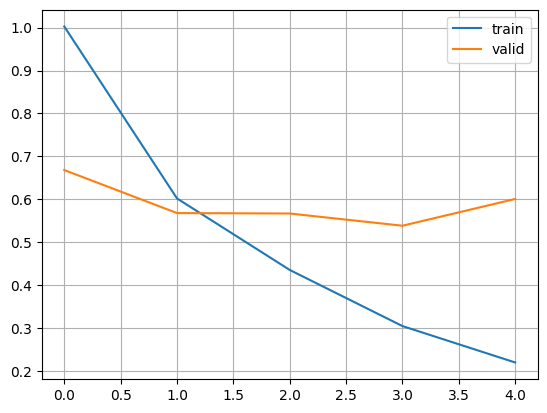

In [20]:
import matplotlib.pyplot as plt

h = history.cpu()
h0 = h.detach().numpy()
print(h0.shape)
plt.plot(h0[:,0], h0[:,1], label='train')
plt.plot(h0[:,0], h0[:,2], label='valid')
plt.legend()
plt.grid()
plt.show()

In [21]:
f_m = best_model.cpu()

f_m.eval()
with torch.no_grad():
  is_first = True
  for x_tensor, y_tensor in test_loader:
    x_tensor = x_tensor.cpu()
    y_tensor = y_tensor.cpu()
    pred_prob = f_m(x_tensor)
    pred = torch.argmax(pred_prob, dim=-1) # class Ïàò ÎßåÌÅº ÎÇòÏò§ÎØÄÎ°ú Í∞ÄÏû• ÌÅ∞ ÌôïÎ•†Ïùò indexÎ•º ÏñªÏñ¥ÏïºÌï®.

    # print(y_tensor.numpy().shape)
    if is_first:
      test_pred = pred.numpy().copy()
      test_label = y_tensor.numpy().copy()
      is_first = False
    else:
      test_label = np.concatenate((test_label, y_tensor.numpy()), axis=0)
      test_pred = np.concatenate((test_pred, pred.numpy()), axis=0)

print(test_label.shape, test_label.dtype)
print(test_pred.shape, test_pred.dtype)

(10000,) int64
(10000,) int64


In [22]:
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    fbeta_score,
)
pred = test_pred
label = test_label

print('Confusion Matrix\n',
      str(confusion_matrix(label,pred))
      )
print(f'Precision           :{np.round(precision_score(label,pred,average=None),2)}')
print(f'Precision (macro)   :{np.round(precision_score(label,pred,average="macro"),2)}')
print(f'Precision (micro)   :{np.round(precision_score(label,pred,average="micro"),2)}')
print(f'Precision (weighted):{np.round(precision_score(label,pred,average="weighted"),2)}')
print(f'Recall              :{np.round(recall_score(label,pred,average=None),2)}')
print(f'Recall    (macro)   :{np.round(recall_score(label,pred,average="macro"),2)}')
print(f'Recall    (micro)   :{np.round(recall_score(label,pred,average="micro"),2)}')
print(f'Recall    (weighted):{np.round(recall_score(label,pred,average="weighted"),2)}')
print(f'F1-score            :{np.round(f1_score(label,pred,average=None),2)}')
print(f'F1-score  (macro)   :{np.round(f1_score(label,pred,average="macro"),2)}')
print(f'F1-score  (micro)   :{np.round(f1_score(label,pred,average="micro"),2)}')
print(f'F1-score  (weighted):{np.round(f1_score(label,pred,average="weighted"),2)}')
print(f'F2-score            :{np.round(fbeta_score(label,pred,beta=2,average=None),2)}')
print(f'F2-score  (macro)   :{np.round(fbeta_score(label,pred,beta=2,average="macro"),2)}')
print(f'F2-score  (micro)   :{np.round(fbeta_score(label,pred,beta=2,average="micro"),2)}')
print(f'F2-score  (weighted):{np.round(fbeta_score(label,pred,beta=2,average="weighted"),2)}')



Confusion Matrix
 [[863  14  30  12  12   3   4  14  37  11]
 [  5 912   2   6   0   2   3   4  13  53]
 [ 32   2 753  34  64  25  57  24   6   3]
 [ 12   9  35 697  48  96  51  29  12  11]
 [ 14   4  50  38 771  23  36  55   8   1]
 [  6   3  21 216  30 643  23  46   6   6]
 [  5   8  26  32  18   9 889   6   2   5]
 [  8   4  18  31  30  16   5 880   2   6]
 [ 56  30   8   5   3   0   2   4 878  14]
 [ 22  62   7   9   2   2   0  21  12 863]]
Precision           :[0.84 0.87 0.79 0.65 0.79 0.79 0.83 0.81 0.9  0.89]
Precision (macro)   :0.82
Precision (micro)   :0.81
Precision (weighted):0.82
Recall              :[0.86 0.91 0.75 0.7  0.77 0.64 0.89 0.88 0.88 0.86]
Recall    (macro)   :0.81
Recall    (micro)   :0.81
Recall    (weighted):0.81
F1-score            :[0.85 0.89 0.77 0.67 0.78 0.71 0.86 0.84 0.89 0.87]
F1-score  (macro)   :0.81
F1-score  (micro)   :0.81
F1-score  (weighted):0.81
F2-score            :[0.86 0.9  0.76 0.69 0.77 0.67 0.88 0.87 0.88 0.87]
F2-score  (macro)   :0.81